# Predicting Customer Churn in SyriaTel

## 1. Overview

a). Business Understanding

SyriaTel, a company in the telecommunication industry, has approached us with a pressing challenge: high customer churn rates are leading to financial losses and decreased customer satisfaction. To combat this issue, SyriaTel aims to accurately predict which customers are likely to leave, allowing them to take proactive measures to retain them. However, traditional methods for predicting customer churn have proven to be unreliable, with high rates of false positives and false negatives.

In light of this, SyriaTel has tasked us with developing a machine learning classification model that can accurately predict customer churn based on historical usage patterns and demographic information. Our goal is to create a model that will help SyriaTel minimize financial losses and improve customer satisfaction.

Problem Statement

The telecommunication industry is facing a challenge of high customer churn rates, leading to financial losses and decreased customer satisfaction. Traditional methods for predicting customer churn have high false-positive and false-negative rates, making it difficult for companies such as SyriaTel to accurately identify which customers are at risk of leaving and take proactive measures to retain them.

Objectives

The primary objective of this project is to reduce customer churn, which is the loss of customers to competitors. By predicting which customers are at risk of leaving

Identify which features/predictor variables affect the attrition of customers.

Build 3 Classification models and evaluate the best one for classifying and predicting the churn rate

Metric of success

The project wil be considered a success if the classification model accurately identifies a high proportion of actual churners(High Recall) with a low number of false positive predictions(Low False Positive Rate) and demonstrates good generalization performance(Accuracy of 80% on unseen dataset).

## b). Data Understanding.

The dataset used was obtained from Kaggle (Churn in Telecom's dataset) and comprises of 3333 rows and 21 columns. All the features except the phone number and state have numerical values, with the rest being categorical or binary (international plan, voice mail plan, and churn). The churn column will be used as our target variable

This is a binary classification problem where the goal is to predict the likelihood of a customer churning and the churn column will be represented by 1 - True and 0 - False

# 2. Data Pre-Processing

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV

Loading the data set

In [30]:
df = pd.read_csv('data set/bigml_59c28831336c6604c800002a.csv')
data = df.copy()
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [31]:
# Get a brief overview using .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset has 3333 records with 21 columns or features. These features include information about the customer's state, account length, area code, phone number, international plan, voice mail plan, and call usage details (minutes and charges) for different time periods (day, evening, night, international). The last column, "churn", is the target variable indicating whether the customer has churned or not. All the features except the phone number and state have numerical values, with the rest being categorical or binary (international plan, voice mail plan, and churn). The data does not contain any missing values

In [32]:
# Get statistical description of the data using .describe()
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [33]:
#Get the value counts of the target variable using .value_counts()
data['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [34]:
# View the Unique Values using .nunique()
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [35]:
# Preview the top of the dataset
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [36]:
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


a) Checking for missing values

In [37]:
# Check for missing values
missing_values = data.isnull().sum()

# Print the count of missing values for each column
print("Missing values count for each column:")
print(missing_values)

# Check if there are any missing values in the DataFrame
if missing_values.sum() == 0:
    print("No missing values found.")
else:
    print("There are missing values in the dataset.")

Missing values count for each column:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64
No missing values found.


In [38]:
# Checking duplicated rows
data.duplicated().sum()


0

In [39]:
# Checking for duplicate in phone number
duplicates_numbers = data.duplicated(subset ='phone number')
duplicates_numbers.unique()

array([False])

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

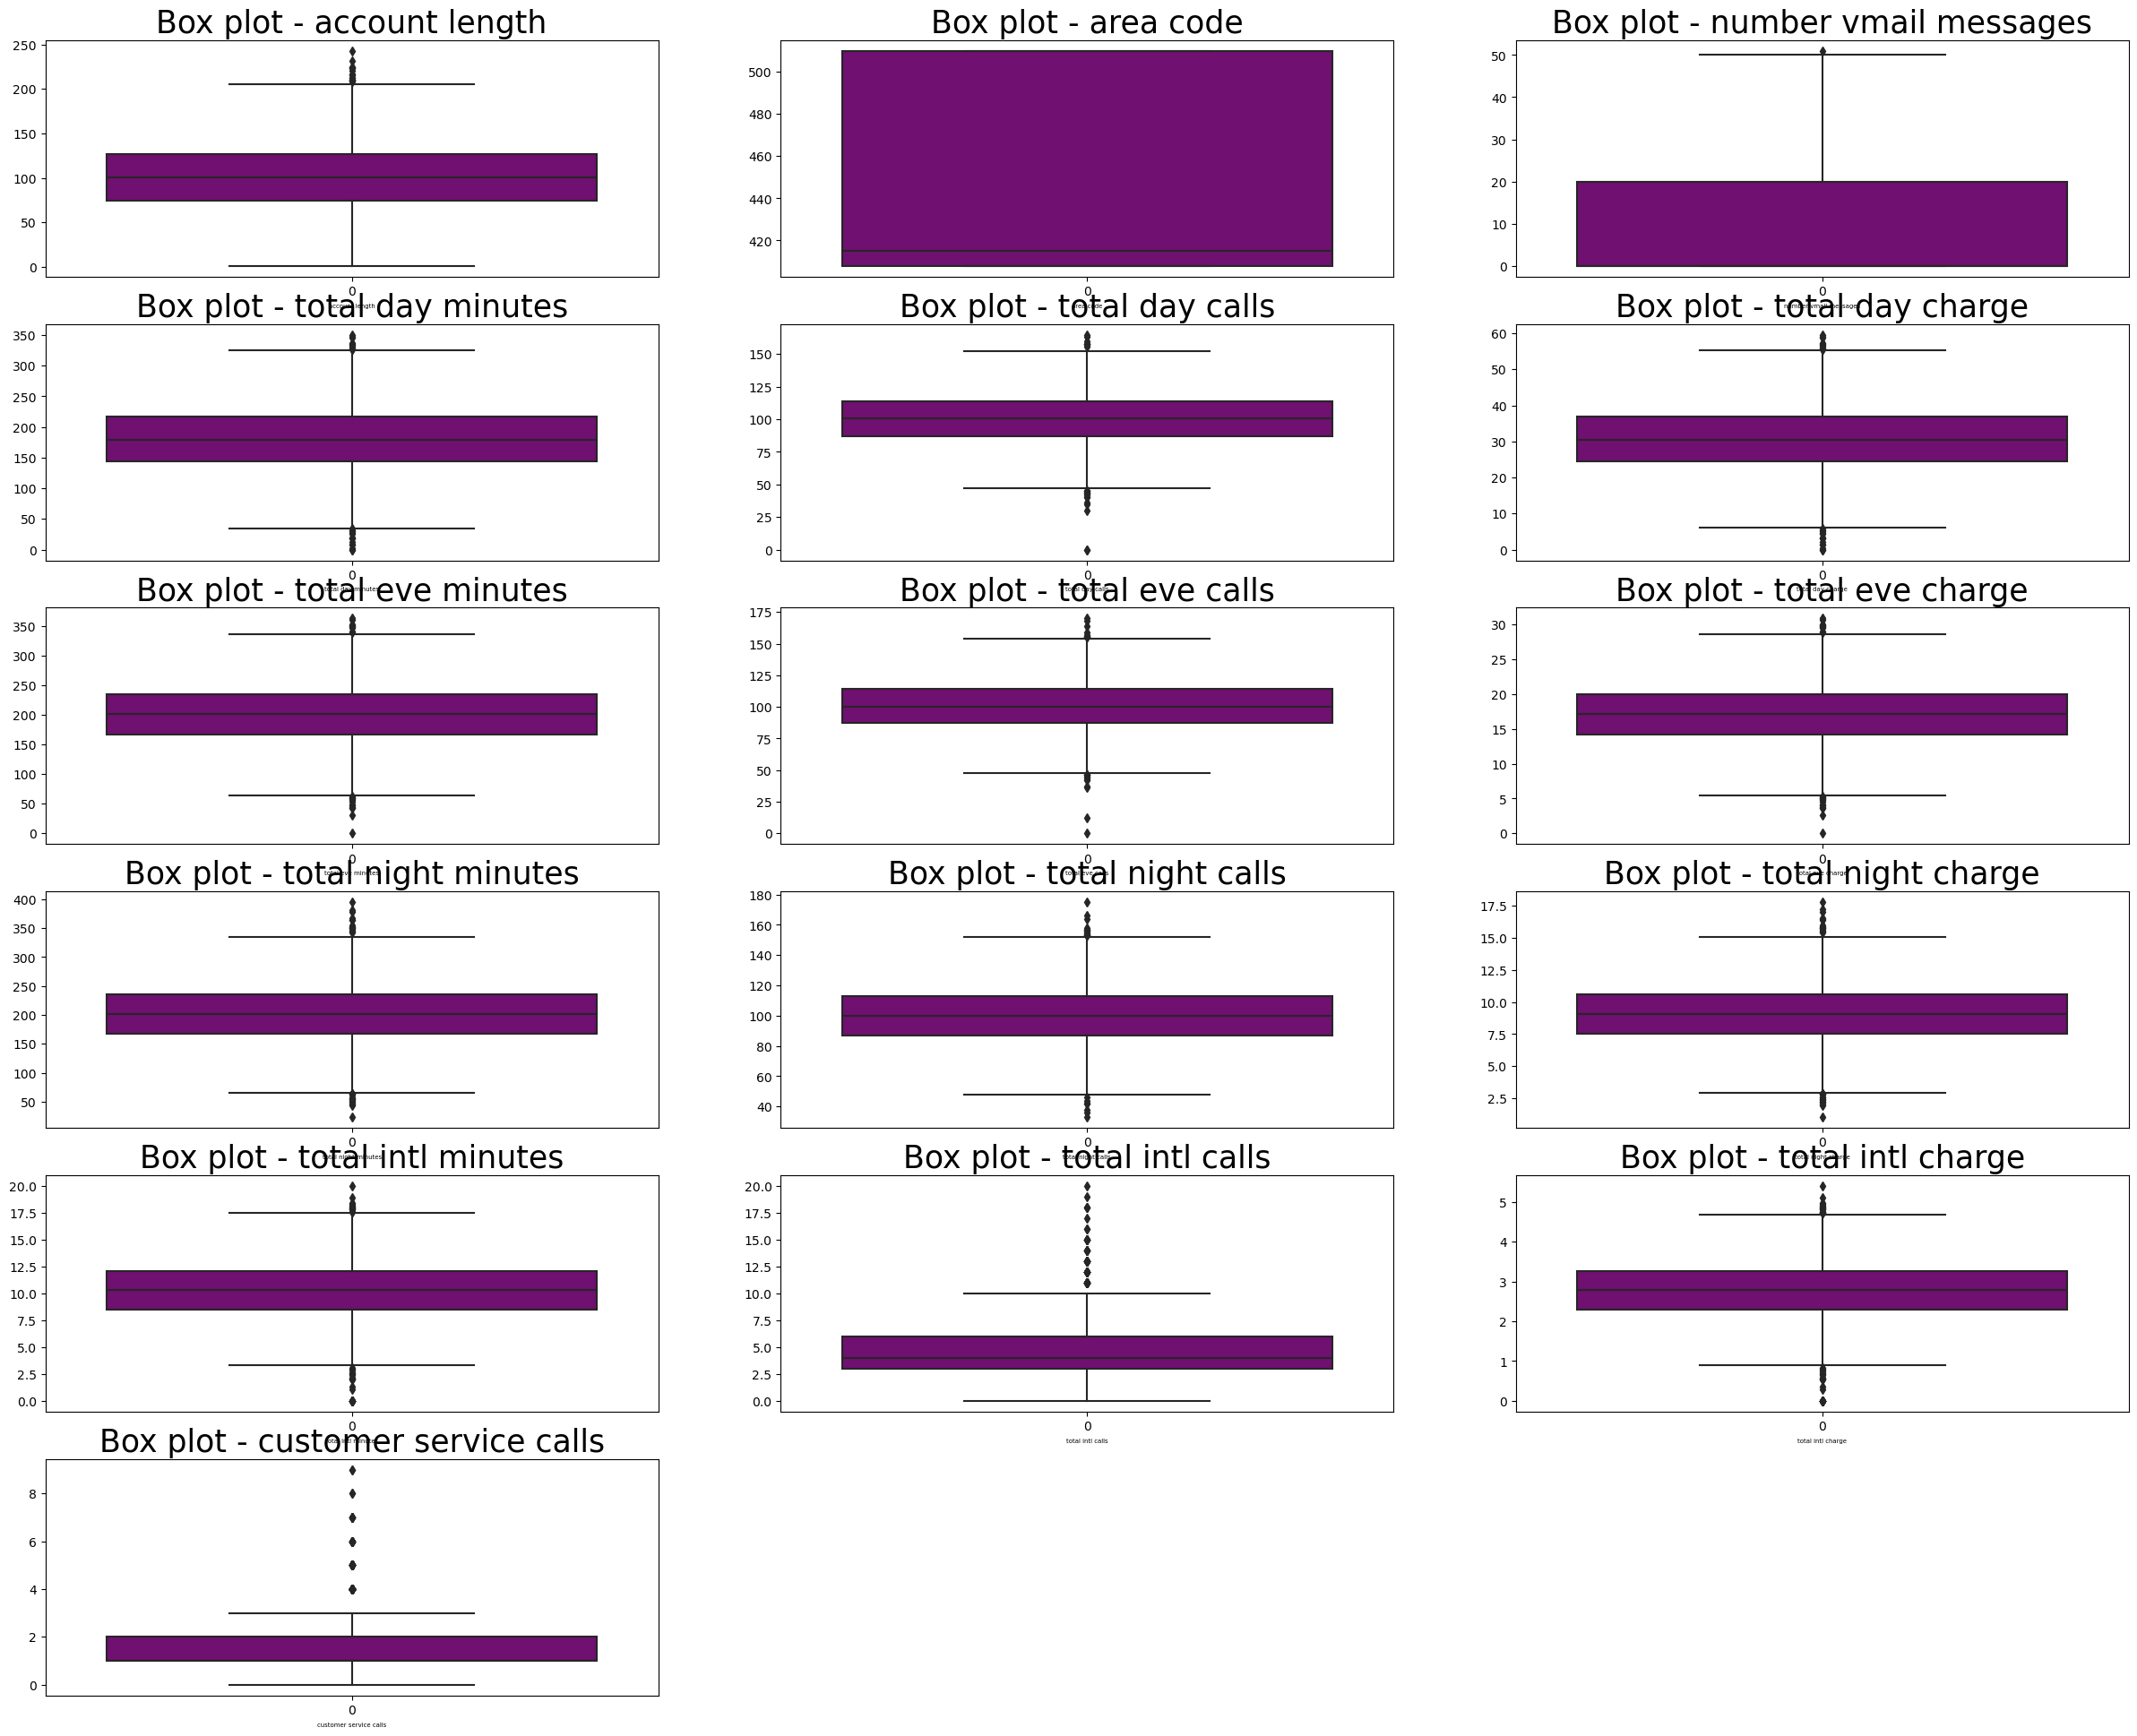

In [40]:
# Creating a list of columns with numeric values
numeric_cols = data.select_dtypes('number').columns

# Calculate the number of rows and columns for subplots
num_rows = (len(numeric_cols) - 1) // 3 + 1
num_cols = min(len(numeric_cols), 3)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10*num_cols, 4*num_rows))

# Generate box plots for each numeric column
for i, column in enumerate(numeric_cols):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=data[column], ax=axes[row, col], color='purple')
    axes[row, col].set_title(f'Box plot - {column}', fontsize=25)
    axes[row, col].set_xlabel(column, fontsize=5)

# Remove any empty subplots
if i < (num_rows * num_cols) - 1:
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout

In [41]:
# Checking for place holders
columns = ['state','area code','international plan', 'voice mail plan', 'churn']  
unique_values = {}
for col in columns:
    unique_values[col] = data[col].unique()
unique_values

{'state': array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
        'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
        'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
        'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
        'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object),
 'area code': array([415, 408, 510], dtype=int64),
 'international plan': array(['no', 'yes'], dtype=object),
 'voice mail plan': array(['yes', 'no'], dtype=object),
 'churn': array([False,  True])}

Conversion of data types

In [43]:

# Checking data types of categorical variables
columns = ['state', 'area code', 'international plan', 'voice mail plan']
column_data_types = data[columns].dtypes
print(column_data_types)

state                 object
area code              int64
international plan    object
voice mail plan       object
dtype: object


In [44]:
# Convert churn, international plan and  voice mail plan column from boolean to integer
data["churn"] = data["churn"].astype(int)
print(data["churn"].dtype)

int32


In [45]:
# Convert "State" column to categorical data type
data["area code"] = data["area code"].astype("str")
print(data["area code"].dtype)

object
